In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from ipywidgets import interact

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/stanford-cars-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.82G/1.82G [00:16<00:00, 118MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2


## 1.Сбор, подготовка данных, обобщение в меньшее кол-во классов (196 -> 9)

In [4]:
# Пути к разметке для train и test
train_labels_path = 'https://drive.google.com/uc?export=download&id=1Wh-NCRjBbONPL6kjs55jWvtyPdTwWdYi'
test_labels_path = 'https://drive.google.com/uc?export=download&id=1g0AQ8Gtku3EDjdCNqJLb3ewzJJoLZbOG'

# Пути к фото для train и test
train_images_path = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_train/cars_train'
test_images_path = '/root/.cache/kagglehub/datasets/jessicali9530/stanford-cars-dataset/versions/2/cars_test/cars_test'

# Обобщение в категории
general_categories = {
    'Sedan': ['Sedan'],
    'SUV': ['SUV'],
    'Coupe': ['Coupe'],
    'Convertible': ['Convertible'],
    'Hatchback': ['Hatchback'],
    'Minivan': ['Minivan'],
    'Van': ['Van'],
    'Truck': ['Crew Cab', 'Extended Cab', 'Regular Cab'],
}

# Функция для маппинга широкого спектра категорий на более общие
def map_to_general_category(class_name):
    for category, keywords in general_categories.items():
        if any(keyword in class_name for keyword in keywords):
            return category
    return 'Other'

# Загрузили и обработали таблицу с разметкой для train
df_train = pd.read_csv(train_labels_path)
df_train.rename(columns={'x1': 'boxx_1', 'y1': 'boxy_1', 'x2': 'boxx_2', 'y2': 'boxy_2', 'image': 'file_name', 'ture_class_name': 'class_name'}, inplace=True)
df_train['general_class_name'] = df_train['class_name'].apply(map_to_general_category)
df_train['general_class'] = pd.factorize(df_train['general_class_name'])[0] + 1

# Загрузили и обработали таблицу с разметкой для test
df_test = pd.read_csv(test_labels_path)
df_test.rename(columns={'x1': 'boxx_1', 'y1': 'boxy_1', 'x2': 'boxx_2', 'y2': 'boxy_2', 'image': 'file_name', 'ture_class_name': 'class_name'}, inplace=True)
df_test['general_class_name'] = df_test['class_name'].apply(map_to_general_category)
df_test['general_class'] = pd.factorize(df_test['general_class_name'])[0] + 1

In [5]:
print(f"Кол-во классов уменьшилось с {df_train['class_name'].nunique()} до {df_train['general_class_name'].nunique()}")

Кол-во классов уменьшилось с 196 до 9


In [6]:
df_train

,boxx_1,boxy_1,boxx_2,boxy_2,class,file_name,class_name,general_class_name,general_class
0,39,116,569,375,14,00001.jpg,Audi TTS Coupe 2012,Coupe,1
1,36,116,868,587,3,00002.jpg,Acura TL Sedan 2012,Sedan,2
2,85,109,601,381,91,00003.jpg,Dodge Dakota Club Cab 2007,Other,3
3,621,393,1484,1096,134,00004.jpg,Hyundai Sonata Hybrid Sedan 2012,Sedan,2
4,14,36,133,99,106,00005.jpg,Ford F-450 Super Duty Crew Cab 2012,Truck,4
...,...,...,...,...,...,...,...,...,...
8139,3,44,423,336,78,08140.jpg,Chrysler Town and Country Minivan 2012,Minivan,7
8140,138,150,706,523,196,08141.jpg,smart fortwo Convertible 2012,Convertible,5
8141,26,246,660,449,163,08142.jpg,Mercedes-Benz SL-Class Coupe 2009,Coupe,1
8142,78,526,1489,908,112,08143.jpg,Ford GT Coupe 2006,Coupe,1


In [7]:
df_test

,boxx_1,boxy_1,boxx_2,boxy_2,class,file_name,class_name,general_class_name,general_class
0,30,52,246,147,181,00001.jpg,Suzuki Aerio Sedan 2007,Sedan,1
1,100,19,576,203,103,00002.jpg,Ferrari 458 Italia Convertible 2012,Convertible,2
2,51,105,968,659,145,00003.jpg,Jeep Patriot SUV 2012,SUV,3
3,67,84,581,407,187,00004.jpg,Toyota Camry Sedan 2012,Sedan,1
4,140,151,593,339,185,00005.jpg,Tesla Model S Sedan 2012,Sedan,1
...,...,...,...,...,...,...,...,...,...
8036,49,57,1169,669,63,08037.jpg,Chevrolet Sonic Sedan 2012,Sedan,1
8037,23,18,640,459,16,08038.jpg,Audi V8 Sedan 1994,Sedan,1
8038,33,27,602,252,17,08039.jpg,Audi 100 Sedan 1994,Sedan,1
8039,33,142,521,376,38,08040.jpg,BMW Z4 Convertible 2012,Convertible,2


## 2. Анализ

### 2.1 Анализ распределения классов

In [8]:
df_train.groupby('general_class_name').agg({'general_class_name' : 'count'})

,general_class_name
general_class_name,
Convertible,1005
Coupe,1119
Hatchback,554
Minivan,250
Other,945
SUV,1437
Sedan,1907
Truck,636
Van,291


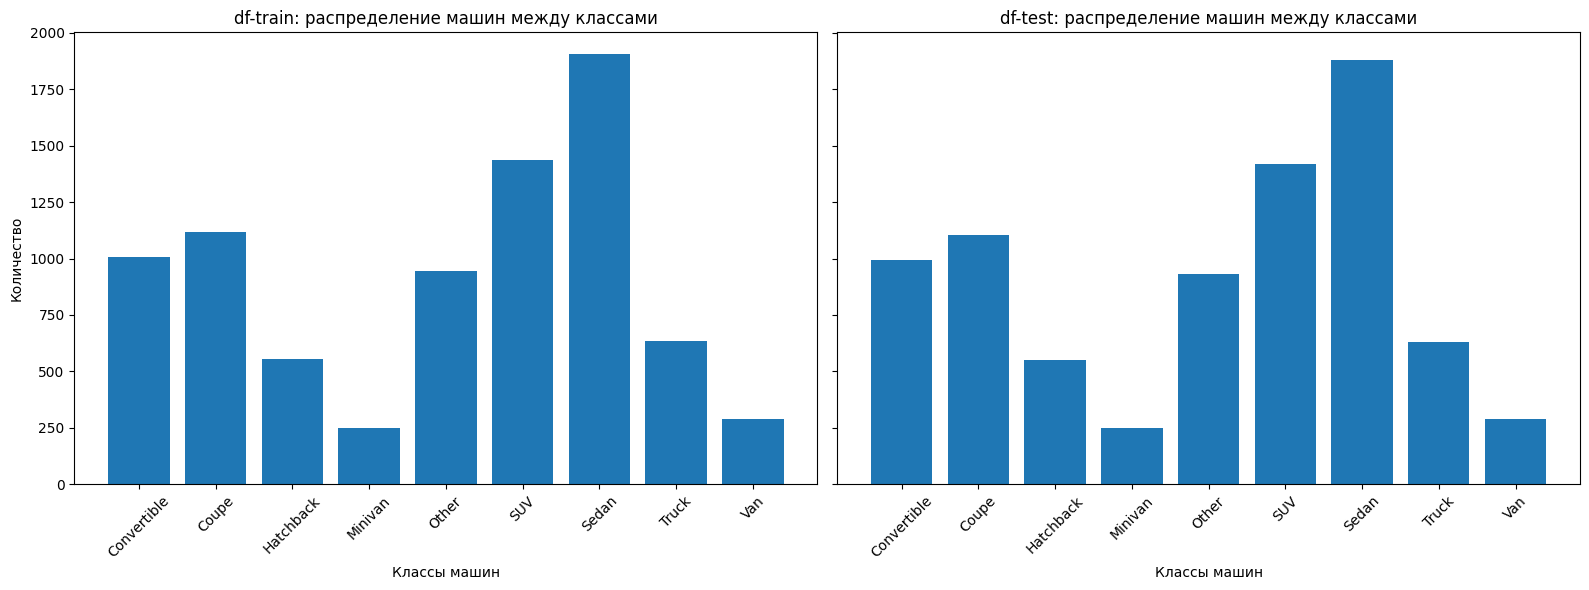

In [9]:
import matplotlib.pyplot as plt

# Группируем данные по general_class_name и считаем количество, затем сортируем по алфавиту
grouped_data_train = df_train.groupby('general_class_name')['general_class_name'].count().sort_index()
grouped_data_test = df_test.groupby('general_class_name')['general_class_name'].count().sort_index()

# Создаем два графика (сетка из 1 строки и 2 столбцов), y-ось будет общей
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Строим график для тренировочного набора данных
axes[0].bar(grouped_data_train.index, grouped_data_train.values)
axes[0].set_title("df-train: распределение машин между классами")
axes[0].set_xlabel("Классы машин")
axes[0].set_ylabel("Количество")
axes[0].tick_params(axis='x', rotation=45)  # Поворачиваем подписи оси x для удобства чтения

# Строим график для тестового набора данных
axes[1].bar(grouped_data_test.index, grouped_data_test.values)
axes[1].set_title("df-test: распределение машин между классами")
axes[1].set_xlabel("Классы машин")
axes[1].tick_params(axis='x', rotation=45)  # Поворачиваем подписи оси x для удобства чтения

# Настраиваем плотное расположение графиков для предотвращения наложений
plt.tight_layout()
plt.show()

### 2.2 Анализ размера объектов

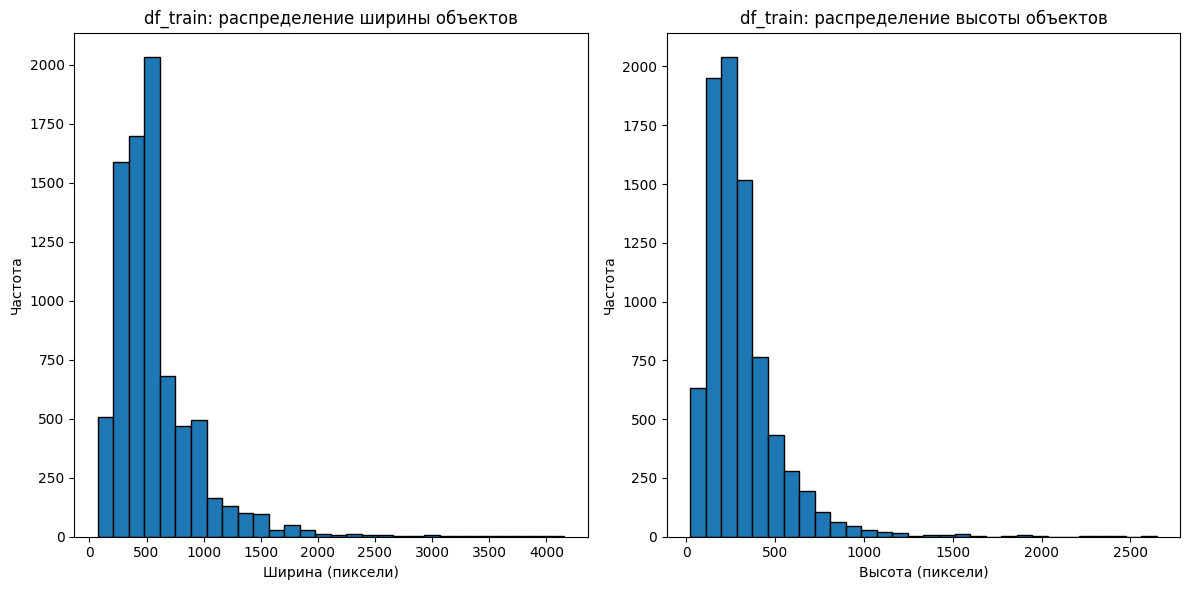

In [11]:
# Отображение размерности объектов df_train

df_train_size = df_train.copy()

df_train_size['width'] = df_train_size['boxx_2'] - df_train_size['boxx_1']
df_train_size['height'] = df_train_size['boxy_2'] - df_train_size['boxy_1']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_train_size['width'], bins=30, edgecolor='black')
plt.title('df_train: распределение ширины объектов')
plt.xlabel('Ширина (пиксели)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df_train_size['height'], bins=30, edgecolor='black')
plt.title('df_train: распределение высоты объектов')
plt.xlabel('Высота (пиксели)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

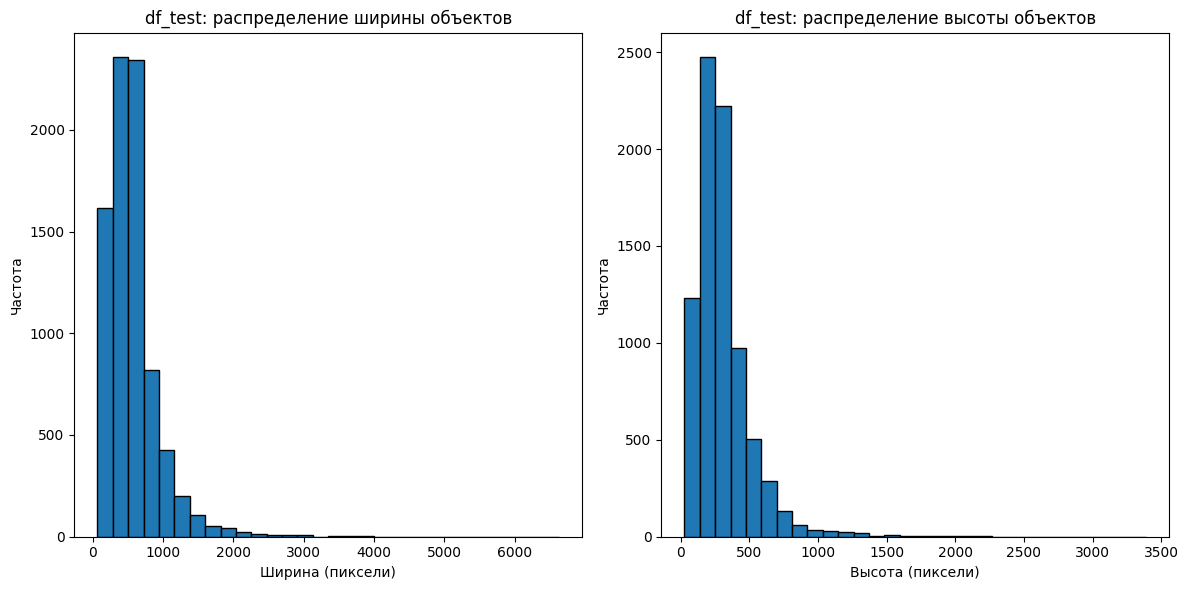

In [13]:
# Отображение размерности объектов df_test

df_test_size = df_test.copy()

df_test_size['width'] = df_test_size['boxx_2'] - df_test_size['boxx_1']
df_test_size['height'] = df_test_size['boxy_2'] - df_test_size['boxy_1']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_test_size['width'], bins=30, edgecolor='black')
plt.title('df_test: распределение ширины объектов')
plt.xlabel('Ширина (пиксели)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
plt.hist(df_test_size['height'], bins=30, edgecolor='black')
plt.title('df_test: распределение высоты объектов')
plt.xlabel('Высота (пиксели)')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

## 3. Визуализация аннотаций

In [14]:
# Функция для получение пути фото
def get_image_path(filename, dataset='train'):
    if dataset == 'train':
        return f"{train_images_path}/{filename}"
    else:
        return f"{test_images_path}/{filename}"

# Функция для получения картинки с аннотацией
def show_image_with_annotation(idx, dataset='train'):
    if dataset == 'train':
        row = df_train.iloc[idx]
    else:
        row = df_test.iloc[idx]

    img_path = get_image_path(row['file_name'], dataset)
    img = Image.open(img_path)

    draw = ImageDraw.Draw(img)
    bbox = (row['boxx_1'], row['boxy_1'], row['boxx_2'], row['boxy_2'])
    draw.rectangle(bbox, outline="red", width=3)
    draw.text((row['boxx_1'], row['boxy_1'] - 10), row['general_class_name'], fill="red")

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Create interactive sliders for train and test
print("Train Set Visualization:")
interact(show_image_with_annotation, idx=(0, len(df_train) - 1), dataset='train')

print("Test Set Visualization:")
interact(show_image_with_annotation, idx=(0, len(df_test) - 1), dataset='test')

Train Set Visualization:


interactive(children=(IntSlider(value=4071, description='idx', max=8143), Text(value='train', description='dat…

Test Set Visualization:


interactive(children=(IntSlider(value=4020, description='idx', max=8040), Text(value='test', description='data…

<function __main__.show_image_with_annotation(idx, dataset='train')>